In [19]:

# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [20]:
df=pd.read_csv('insurance_claims.csv')

In [21]:
df#hyperparametrs applicaple to decision tree are applicable for random forest cause random forest  is made up of decision tree 

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [23]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [24]:
df['fraud_reported'] = df['fraud_reported'].map({'Y': 1, 'N': 0})

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])#har category ko convert karta hai  uske respective lable 
        # label_encoders[col]= le #to store the og lables for future use maybe to show the output 

In [26]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,71610,6510,13020,52080,10,1,2004,1,NaN
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,5070,780,780,3510,8,12,2007,1,NaN
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,1,34650,7700,3850,23100,4,30,2007,0,NaN
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,1,63400,6340,6340,50720,3,34,2014,1,NaN
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,6500,1300,650,4550,0,31,2009,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,0,87200,17440,8720,61040,6,6,2006,0,NaN
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,0,108480,18080,18080,72320,13,28,2015,0,NaN
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,2,67500,7500,7500,52500,11,19,1996,0,NaN
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,2,46980,5220,5220,36540,1,5,1998,0,NaN


In [38]:
# Drop irrelevant columns
X = df.drop(columns=['fraud_reported', '_c39', 'policy_number', 'insured_zip', 'incident_location', 'incident_date', 'policy_bind_date'])

# Define target variable
Y = df['fraud_reported']


In [40]:
from sklearn.model_selection import train_test_split

# Splitting the balanced dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42,stratify = Y)#stratify is used to make sure the proportion in training and test set is maintained 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Apply scaling to training data
X_test = scaler.transform(X_test)  # Apply same scaling to test data
#using std scaler cause we arent sure if salary might have heavy outliers or not #scaling  can improve a numerical data accuracy  with data having different ranges 

we are trying only 4 hyperparameters(i can use more)

Random forest hyperparametrs
Using today:

no. of estimators

max_depth

min sample split 

min sample leaf


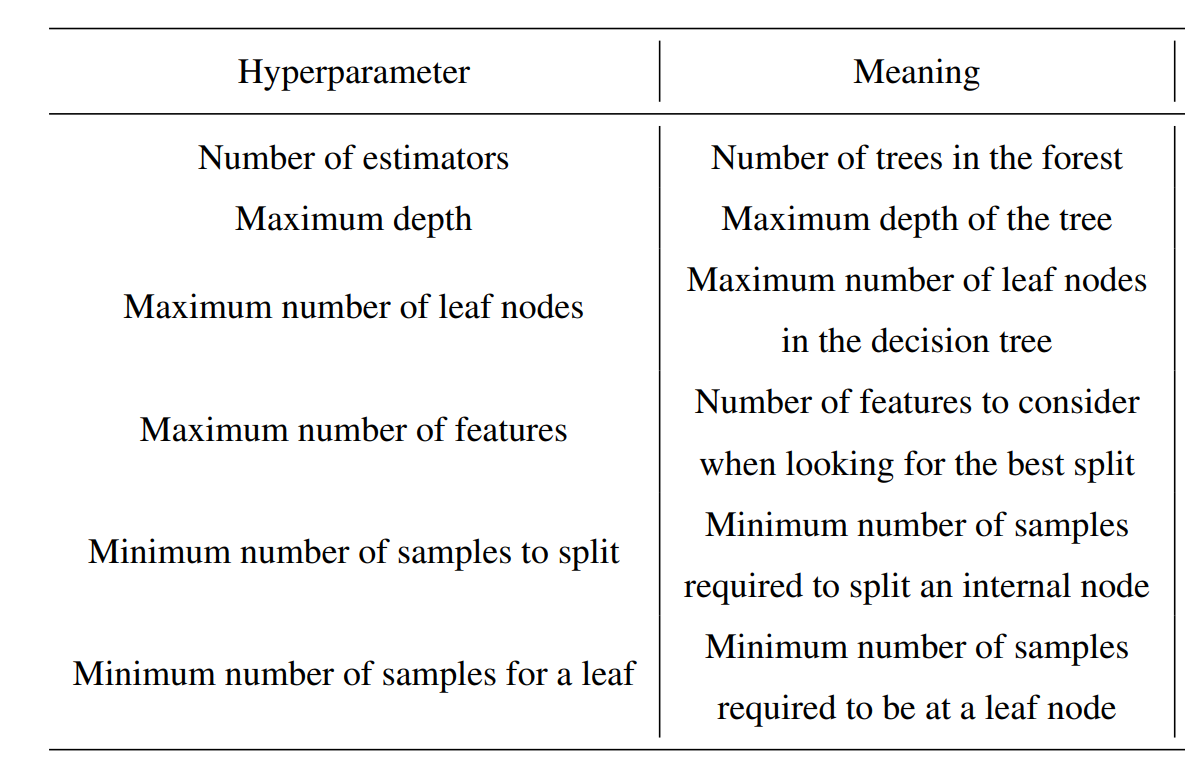


In [42]:
# define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_leaf': [1, 2, 4],  
    'min_samples_split': [2, 5, 10]
}

In [44]:

# Initialize Random Forest classifier(we can use any method and their combiation like SVM and decision tree (becaomes RF) or SVM and naive baise etc for parallel ensembling) 
rf_classifier = RandomForestClassifier(random_state=42)#does parralell ensembling known as bagging simplest bagging algorithm whree it brings diff decision trees together to run parallelly
#the other method is Boosting which does sequenctially ( two types weak(base) and strong(top) , u take a subset and give a weak classifier(very first set of classifers given to dataset) some it does correctly and some wrong now what boosting does is it gives more weight to the correctly done classificstion now the next time another set of classifer is done(strong) it will give more priority to higher weighted i.e corrected classification;thus boosting means week classifiers  jiso input data jo output dega some correct some incorrect and uspe once more strong and repeat strong pe strong thus increasing the learning capacity of model by giving it an amount of wrong outputs so that through it it learns the right correct output(samples) 

In [46]:
grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Faster Execution – Utilizes all CPU cores, significantly reducing the training time, especially when testing multiple hyperparameter combinations.


    verbose=1
)
# Fit GridSearchCV
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [47]:
# Display best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}" )

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


In [48]:
best_rf = RandomForestClassifier(**best_params,random_state=42)
best_rf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=50,
                       random_state=42)

In [49]:
y_pred = best_rf.predict(X_test)

In [50]:
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("Classification Report:\n", classification_report(Y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))

Accuracy: 0.7600
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.95      0.86       151
           1       0.53      0.16      0.25        49

    accuracy                           0.76       200
   macro avg       0.66      0.56      0.55       200
weighted avg       0.72      0.76      0.71       200

Confusion Matrix:
 [[144   7]
 [ 41   8]]


In [78]:
#adding SVC before adaboost to check how accuracy changes (just to show adaboost can have different base classifier here its support vector ) if not mentioned like we did previously the default DT is used 
#initially before adding this block the accuracy  was  0.75 
# Define the base classifier (SVC with probability estimation)
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the base classifier (SVC with probability estimation)
svc = SVC(kernel='linear', probability=True, random_state=42)

# Define AdaBoost with SVC as base estimator (Use "estimator" instead of "base_estimator")
adaboost = AdaBoostClassifier(estimator=svc, n_estimators=10, random_state=42, learning_rate=0.5)

# Train the AdaBoost model
adaboost.fit(X_train, Y_train)

# Predictions
y_pred = adaboost.predict(X_test)

# Evaluation
print("✅ Accuracy:", accuracy_score(Y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(Y_test, y_pred))
print("\n📌 Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))


C:\Users\PRISHA\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


✅ Accuracy: 0.755

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86       151
           1       0.00      0.00      0.00        49

    accuracy                           0.76       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.57      0.76      0.65       200


📌 Confusion Matrix:
 [[151   0]
 [ 49   0]]


C:\Users\PRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


C:\Users\PRISHA\AppData\Local\Temp\ipykernel_14264\423853834.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Importance', data=feature_importance_df, palette='viridis')


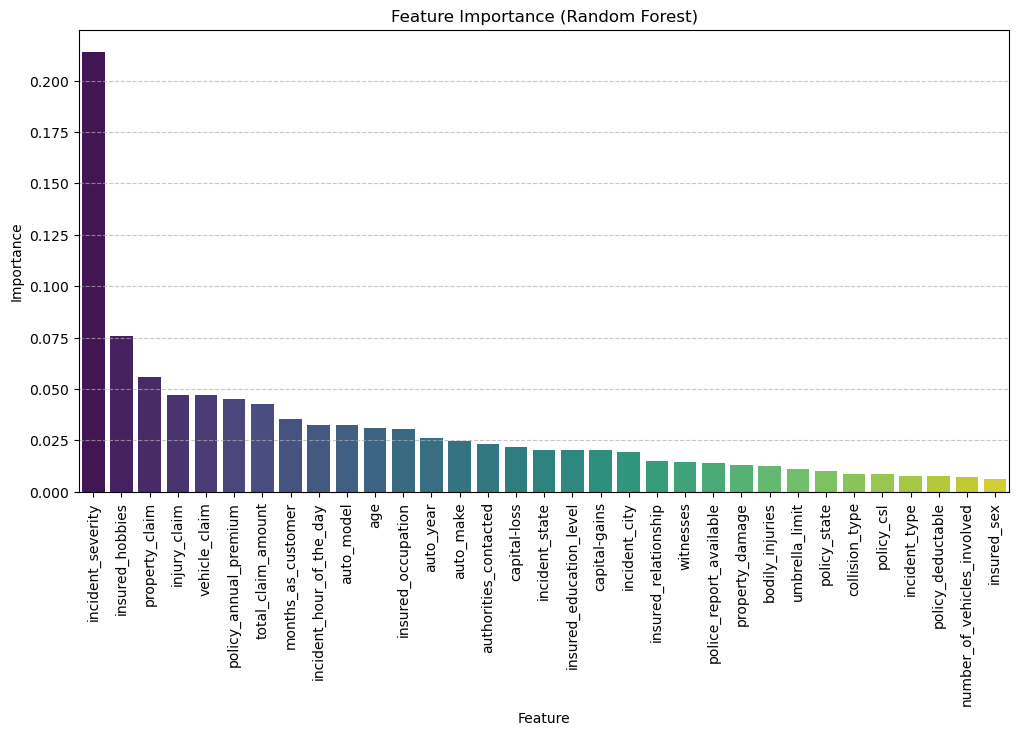

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure feature importance data is in a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,  # Use X.columns as it correctly excludes 'fraud_reported'
    'Importance': best_rf.feature_importances_
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create the plot (VERTICAL)
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Importance', data=feature_importance_df, palette='viridis')

# Improve plot readability
plt.xticks(rotation=90)  # Rotate x-labels for better visibility
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


In [62]:
from sklearn.ensemble import AdaBoostClassifier

# Explicitly specify the SAMME algorithm to avoid the warning
adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, algorithm='SAMME', random_state=42)

# Train the model
adaboost.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.5, n_estimators=100,
                   random_state=42)

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train Gradient Boosting
gradb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gradb.fit(X_train, Y_train)


GradientBoostingClassifier(random_state=42)

🔹 Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       151
           1       0.53      0.16      0.25        49

    accuracy                           0.76       200
   macro avg       0.66      0.56      0.55       200
weighted avg       0.72      0.76      0.71       200



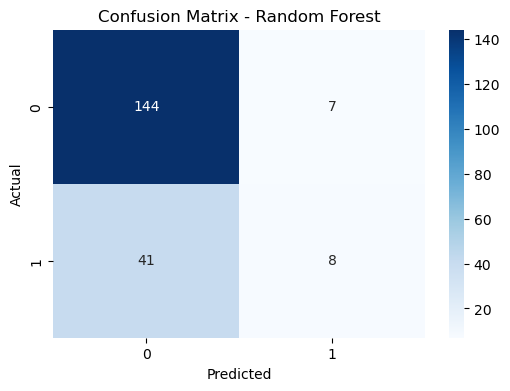

🔹 Model: AdaBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       151
           1       0.57      0.41      0.48        49

    accuracy                           0.78       200
   macro avg       0.70      0.65      0.67       200
weighted avg       0.76      0.78      0.77       200



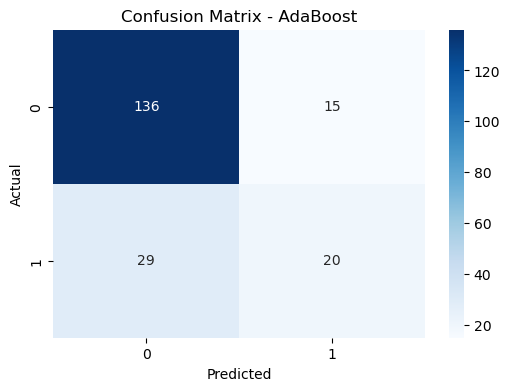

🔹 Model: Gradient Boosting
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       151
           1       0.56      0.49      0.52        49

    accuracy                           0.78       200
   macro avg       0.70      0.68      0.69       200
weighted avg       0.77      0.78      0.77       200



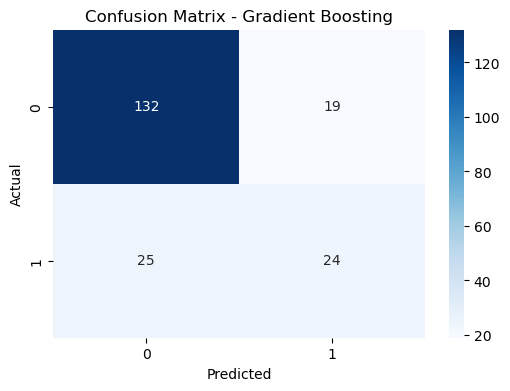

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define models
models = {
    "Random Forest": best_rf,
    "AdaBoost": adaboost,
    "Gradient Boosting": gradb
}

# Iterate through models and evaluate
for name, model in models.items():
    y_pred = model.predict(X_test)
    
    # Print classification report
    print(f"🔹 Model: {name}")
    print("Classification Report:")
    print(classification_report(Y_test, y_pred))
    
    # Compute confusion matrix
    cm = confusion_matrix(Y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
    